<a href="https://colab.research.google.com/github/Quanghoaai/Podo/blob/main/TaskTrackerApp(t%E1%BB%AB_t%E1%BB%87p_py_sang_ipynb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Để tạo một ứng dụng tương tự như trong ảnh sử dụng từ tệp.py sang .ipynb
Google Colab, bạn cần sử dụng thư viện ipywidgets thay vì tkinter vì Google Colab không hỗ trợ giao diện đồ họa trực tiếp như tkinter. Dưới đây là một ví dụ về cách bạn có thể tạo một ứng dụng tương tự sử dụng ipywidgets:

Đoạn code này xây dựng một ứng dụng theo dõi thời gian thực hiện các task trong Google Colab bằng cách sử dụng thư viện ipywidgets. Nó có 2 bộ đếm: một bộ hiển thị thời gian của task hiện tại (được cập nhật mỗi giây với khung màu xanh) và một bộ đếm tổng thời gian của tất cả các task (với khung màu cam), cả hai đều được cập nhật liên tục qua các thread nền. Ngoài ra, code còn ghi lại thông tin task vào file CSV và cho phép người dùng khởi tạo, dừng, reset task cũng như xem lại lịch sử task.

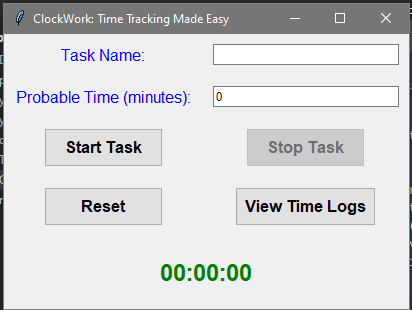

[import tkinter as tk
from tkinter import ttk, messagebox
import csv
import time
from datetime import datetime

class TaskTrackerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ClockWork: Time Tracking Made Easy")
        self.task_name_var = tk.StringVar()
        self.probable_time_var = tk.IntVar()
        self.start_time = None

        self.setup_ui()
        self.create_log_file()

    def setup_ui(self):
        style = ttk.Style()
        style.configure("TLabel", font=("Helvetica", 12))
        style.configure("TButton", font=("Helvetica", 12, 'bold'), padding=6)

        ttk.Label(self.root, text="Task Name:", foreground="blue").grid(row=0, column=0, padx=10, pady=10)
        ttk.Entry(self.root, textvariable=self.task_name_var, width=30).grid(row=0, column=1, padx=10, pady=10)
        ttk.Label(self.root, text="Probable Time (minutes):", foreground="blue").grid(row=1, column=0, padx=10, pady=10)
        ttk.Entry(self.root, textvariable=self.probable_time_var, width=30).grid(row=1, column=1, padx=10, pady=10)

        self.start_button = ttk.Button(self.root, text="Start Task", command=self.start_task)
        self.start_button.grid(row=2, column=0, padx=10, pady=10)
        
        self.stop_button = ttk.Button(self.root, text="Stop Task", command=self.stop_task, state=tk.DISABLED)
        self.stop_button.grid(row=2, column=1, padx=10, pady=10)

        ttk.Button(self.root, text="Reset", command=self.reset_task).grid(row=3, column=0, padx=10, pady=10)
        ttk.Button(self.root, text="View Time Logs", command=self.view_time_logs).grid(row=3, column=1, padx=10, pady=10)

        self.timer_label = ttk.Label(self.root, text="00:00:00", font=("Helvetica", 18, 'bold'), foreground="green")
        self.timer_label.grid(row=4, column=0, columnspan=2, padx=10, pady=20)

    def create_log_file(self):
        with open("time_log.csv", "a", newline="") as file:
            writer = csv.writer(file)
            if file.tell() == 0:
                writer.writerow(['Task Name', 'Probable Time (minutes)', 'Start Time', 'End Time', 'Time Spent (minutes)', 'Time Difference (minutes)'])

    def start_task(self):
        if self.task_name_var.get():
            self.start_time = time.time()
            self.start_button.config(state=tk.DISABLED)
            self.stop_button.config(state=tk.NORMAL)
            self.update_timer()

    def stop_task(self):
        self.stop_button.config(state=tk.DISABLED)
        self.start_button.config(state=tk.NORMAL)
        time_spent = round((time.time() - self.start_time) / 60, 2)
        self.log_time(time_spent)

    def update_timer(self):
        if self.start_time:
            time_spent = time.time() - self.start_time
            time_str = time.strftime('%H:%M:%S', time.gmtime(time_spent))
            self.timer_label.config(text=time_str)
            self.root.after(1000, self.update_timer)

    def log_time(self, time_spent):
        end_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        time_diff = round(time_spent - self.probable_time_var.get(), 2)
        with open("time_log.csv", "a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow([self.task_name_var.get(), self.probable_time_var.get(), self.start_time, end_time, time_spent, time_diff])

    def reset_task(self):
        self.task_name_var.set("")
        self.probable_time_var.set("")
        self.timer_label.config(text="00:00:00")
        self.start_button.config(state=tk.NORMAL)
        self.stop_button.config(state=tk.DISABLED)

    def view_time_logs(self):
        try:
            with open("time_log.csv", "r") as file:
                logs = list(csv.reader(file))
            if len(logs) > 1:
                log_window = tk.Toplevel(self.root)
                log_window.title("Time Logs")
                text_area = tk.Text(log_window, height=20, width=120)
                text_area.pack(padx=10, pady=10)
                for log in logs[1:]:
                    task_name, probable_time, start_time, end_time, time_spent, time_diff = log
                    color = "green" if float(time_diff) < 0 else "red"
                    text_area.insert(tk.END, f"Task: {task_name}, Probable: {probable_time} min, Time Spent: {time_spent} min, Diff: {time_diff} min\n", color)
                text_area.config(state=tk.DISABLED)
                text_area.tag_config("green", foreground="green")
                text_area.tag_config("red", foreground="red")
            else:
                messagebox.showinfo("No Logs", "No task logs found.")
        except Exception as e:
            messagebox.showerror("Error", f"Could not read time logs: {e}")

if __name__ == "__main__":
    root = tk.Tk()
    app = TaskTrackerApp(root)
    root.mainloop()
]
=>
Đoạn code mẫu được thiết kế nhằm tạo ra một ứng dụng theo dõi thời gian (time tracking) cho các task, với mục tiêu giúp người dùng dễ dàng ghi lại thời gian dự kiến và thời gian thực tế khi thực hiện một nhiệm vụ. Dưới đây là một số điểm chính của đoạn code:

- **Giao diện người dùng (UI):**  
  Ứng dụng sử dụng thư viện tkinter để tạo giao diện đồ họa. Các widget như Label, Entry và Button được sử dụng để nhập tên nhiệm vụ, thời gian dự kiến (tính theo phút) và hiển thị đồng hồ đếm ngược, cùng với các nút để bắt đầu, dừng, đặt lại và xem lịch sử thời gian đã ghi.

- **Quản lý thời gian:**  
  Khi người dùng nhấn nút "Start Task", ứng dụng lưu thời điểm bắt đầu và kích hoạt một hàm cập nhật đồng hồ (sử dụng phương thức `after` của tkinter) để hiển thị thời gian đã trôi qua theo định dạng HH:MM:SS. Khi nhấn "Stop Task", ứng dụng tính toán thời gian thực hiện (đổi sang phút, làm tròn đến 2 chữ số thập phân) và ghi lại thông tin này.

- **Ghi log dữ liệu:**  
  Thông tin của từng nhiệm vụ (bao gồm tên task, thời gian dự kiến, thời điểm bắt đầu, kết thúc, thời gian thực hiện và hiệu số thời gian) được lưu vào tệp CSV. Điều này giúp người dùng có thể lưu trữ và xem lại lịch sử công việc đã thực hiện.

- **Xem lịch sử:**  
  Khi nhấn nút "View Time Logs", ứng dụng sẽ mở một cửa sổ mới hiển thị danh sách các task đã được ghi log. Các dòng log có hiệu số thời gian (sự khác biệt giữa thời gian thực và thời gian dự kiến) được đánh dấu màu xanh hoặc đỏ tùy thuộc vào kết quả so sánh.

- **Kiến trúc hướng đối tượng:**  
  Ứng dụng được đóng gói trong một lớp `TaskTrackerApp`, giúp quản lý các thành phần giao diện, xử lý sự kiện và thao tác với tệp một cách có tổ chức, dễ bảo trì.

Như vậy, mục đích của đoạn code là tạo ra một ứng dụng đơn giản nhưng đầy đủ chức năng để theo dõi và ghi lại thời gian làm việc của các nhiệm vụ, hỗ trợ người dùng đánh giá hiệu quả thực hiện so với thời gian dự kiến. Điều này đặc biệt hữu ích trong việc quản lý công việc và cải thiện hiệu suất làm việc.

In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
import time, csv, threading
from datetime import datetime
from google.colab import output

# Khởi tạo các widget cần thiết với layout được định dạng theo yêu cầu
label_task_name = widgets.Label("Task Name:")
input_task_name = widgets.Text(value='', placeholder='Enter task name')
label_probable_time = widgets.Label("Probable Time (minutes):")
input_probable_time = widgets.IntText(value=0)
start_button = widgets.Button(description="Start Task", button_style='success')
stop_button = widgets.Button(description="Stop Task", button_style='danger', disabled=True)
reset_button = widgets.Button(description="Reset")
view_logs_button = widgets.Button(description="View Time Logs")

# Bộ đếm thời gian của task hiện tại: khung màu xanh (blue)
label_timer = widgets.Label(
    value="00:00:00",
    style={'font_size': '24px', 'color': 'black'},
    layout=widgets.Layout(border='2px solid blue', padding='10px')
)

# Bộ đếm tổng thời gian: khung màu cam (orange)
label_total_time = widgets.Label(
    value="Total Time: 00:00:00",
    style={'font_size': '24px', 'color': 'black'},
    layout=widgets.Layout(border='2px solid orange', padding='10px')
)

output_logs = widgets.Output()

# Biến toàn cục
start_time = None
running_timer = False
total_time_accumulated = 0  # tính bằng giây

def create_log_file():
    with open("time_log.csv", "a", newline="") as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(['Task Name', 'Probable Time (minutes)', 'Start Time', 'End Time', 'Time Spent (minutes)', 'Time Difference (minutes)'])
create_log_file()

def update_timer():
    global running_timer
    while running_timer:
        elapsed = time.time() - start_time
        label_timer.value = time.strftime('%H:%M:%S', time.gmtime(elapsed))
        time.sleep(1)

def update_total_timer():
    # Hàm này luôn cập nhật tổng thời gian (bao gồm thời gian của task đang chạy nếu có)
    while True:
        if running_timer and start_time is not None:
            current_total = total_time_accumulated + (time.time() - start_time)
        else:
            current_total = total_time_accumulated
        label_total_time.value = "Total Time: " + time.strftime('%H:%M:%S', time.gmtime(current_total))
        time.sleep(1)

def start_task(change):
    global start_time, running_timer
    if input_task_name.value:
        start_time = time.time()
        running_timer = True
        threading.Thread(target=update_timer, daemon=True).start()
        start_button.disabled = True
        stop_button.disabled = False

def stop_task(change):
    global running_timer, total_time_accumulated
    running_timer = False
    stop_button.disabled = True
    start_button.disabled = False
    elapsed_sec = time.time() - start_time
    total_time_accumulated += elapsed_sec
    time_spent = round(elapsed_sec / 60, 2)
    log_time(time_spent)

def log_time(time_spent):
    end_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    diff = round(time_spent - input_probable_time.value, 2)
    with open("time_log.csv", "a", newline="") as file:
        csv.writer(file).writerow([input_task_name.value, input_probable_time.value,
                                     datetime.fromtimestamp(start_time).strftime('%Y-%m-%d %H:%M:%S'),
                                     end_time, time_spent, diff])

def reset_task(change):
    global start_time, running_timer
    running_timer = False
    input_task_name.value = ""
    input_probable_time.value = 0
    label_timer.value = "00:00:00"
    start_button.disabled = False
    stop_button.disabled = True

def view_time_logs(change):
    output_logs.clear_output()
    with output_logs:
        try:
            with open("time_log.csv", "r") as file:
                logs = list(csv.reader(file))
            if len(logs) > 1:
                for log in logs[1:]:
                    task, probable, start_str, end, spent, diff = log
                    print(f"Task: {task}, Probable: {probable} min, Time Spent: {spent} min, Diff: {diff} min")
            else:
                print("No task logs found.")
        except Exception as e:
            print(f"Could not read time logs: {e}")

start_button.on_click(start_task)
stop_button.on_click(stop_task)
reset_button.on_click(reset_task)
view_logs_button.on_click(view_time_logs)

display(label_task_name, input_task_name,
        label_probable_time, input_probable_time,
        start_button, stop_button,
        reset_button, view_logs_button,
        label_timer, label_total_time, output_logs)

# Khởi động thread cập nhật tổng thời gian
threading.Thread(target=update_total_timer, daemon=True).start()

# Workaround: ép cập nhật widget label_timer trong Colab
def refresh_label():
    try:
        label_timer.send_state()
    except Exception:
        label_timer.value = label_timer.value

output.register_callback('refresh_label', refresh_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_label', [], {});
  }, 1000);
'''))

# Workaround tương tự cho label_total_time
def refresh_total_label():
    try:
        label_total_time.send_state()
    except Exception:
        label_total_time.value = label_total_time.value

output.register_callback('refresh_total_label', refresh_total_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_total_label', [], {});
  }, 1000);
'''))


Label(value='Task Name:')

Text(value='', placeholder='Enter task name')

Label(value='Probable Time (minutes):')

IntText(value=0)

Button(button_style='success', description='Start Task', style=ButtonStyle())

Button(button_style='danger', description='Stop Task', disabled=True, style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

Button(description='View Time Logs', style=ButtonStyle())

Label(value='00:00:00', layout=Layout(border='2px solid blue', padding='10px'))

Label(value='Total Time: 00:00:00', layout=Layout(border='2px solid orange', padding='10px'))

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
import time, csv, threading
from datetime import datetime
from google.colab import output

# Khởi tạo các widget cần thiết
label_task_name = widgets.Label("Task Name:")
input_task_name = widgets.Text(value='', placeholder='Enter task name')
label_probable_time = widgets.Label("Probable Time (minutes):")
input_probable_time = widgets.IntText(value=0)
start_button = widgets.Button(description="Start Task", button_style='success')
stop_button = widgets.Button(description="Stop Task", button_style='danger', disabled=True)
reset_button = widgets.Button(description="Reset")
view_logs_button = widgets.Button(description="View Time Logs")
label_timer = widgets.Label(value="00:00:00", style={'font_size': '24px', 'color': 'green'})
label_total_time = widgets.Label(value="Total Time: 00:00:00", style={'font_size': '24px', 'color': 'blue'})
output_logs = widgets.Output()

# Biến toàn cục
start_time = None
running_timer = False
total_time_accumulated = 0  # tính bằng giây

def create_log_file():
    with open("time_log.csv", "a", newline="") as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(['Task Name', 'Probable Time (minutes)', 'Start Time', 'End Time', 'Time Spent (minutes)', 'Time Difference (minutes)'])
create_log_file()

def update_timer():
    global running_timer
    while running_timer:
        elapsed = time.time() - start_time
        label_timer.value = time.strftime('%H:%M:%S', time.gmtime(elapsed))
        time.sleep(1)

def update_total_timer():
    # Luôn cập nhật label_total_time mỗi giây, bao gồm thời gian của task đang chạy (nếu có)
    while True:
        if running_timer and start_time is not None:
            current_total = total_time_accumulated + (time.time() - start_time)
        else:
            current_total = total_time_accumulated
        label_total_time.value = "Total Time: " + time.strftime('%H:%M:%S', time.gmtime(current_total))
        time.sleep(1)

def start_task(change):
    global start_time, running_timer
    if input_task_name.value:
        start_time = time.time()
        running_timer = True
        threading.Thread(target=update_timer, daemon=True).start()
        start_button.disabled = True
        stop_button.disabled = False

def stop_task(change):
    global running_timer, total_time_accumulated
    running_timer = False
    stop_button.disabled = True
    start_button.disabled = False
    elapsed_sec = time.time() - start_time
    total_time_accumulated += elapsed_sec
    time_spent = round(elapsed_sec / 60, 2)
    log_time(time_spent)

def log_time(time_spent):
    end_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    diff = round(time_spent - input_probable_time.value, 2)
    with open("time_log.csv", "a", newline="") as file:
        csv.writer(file).writerow([input_task_name.value, input_probable_time.value,
                                     datetime.fromtimestamp(start_time).strftime('%Y-%m-%d %H:%M:%S'),
                                     end_time, time_spent, diff])

def reset_task(change):
    global start_time, running_timer
    running_timer = False
    input_task_name.value = ""
    input_probable_time.value = 0
    label_timer.value = "00:00:00"
    start_button.disabled = False
    stop_button.disabled = True

def view_time_logs(change):
    output_logs.clear_output()
    with output_logs:
        try:
            with open("time_log.csv", "r") as file:
                logs = list(csv.reader(file))
            if len(logs) > 1:
                for log in logs[1:]:
                    task, probable, start_str, end, spent, diff = log
                    print(f"Task: {task}, Probable: {probable} min, Time Spent: {spent} min, Diff: {diff} min")
            else:
                print("No task logs found.")
        except Exception as e:
            print(f"Could not read time logs: {e}")

start_button.on_click(start_task)
stop_button.on_click(stop_task)
reset_button.on_click(reset_task)
view_logs_button.on_click(view_time_logs)

display(label_task_name, input_task_name,
        label_probable_time, input_probable_time,
        start_button, stop_button,
        reset_button, view_logs_button,
        label_timer, label_total_time, output_logs)

# Bắt đầu thread cập nhật total time (chạy mãi mãi)
threading.Thread(target=update_total_timer, daemon=True).start()

# Workaround: đăng ký callback để ép widget cập nhật trạng thái trong Colab cho label_timer
def refresh_label():
    try:
        label_timer.send_state()
    except Exception:
        label_timer.value = label_timer.value

output.register_callback('refresh_label', refresh_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_label', [], {});
  }, 1000);
'''))

# Tương tự cho label_total_time
def refresh_total_label():
    try:
        label_total_time.send_state()
    except Exception:
        label_total_time.value = label_total_time.value

output.register_callback('refresh_total_label', refresh_total_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_total_label', [], {});
  }, 1000);
'''))


Label(value='Task Name:')

Text(value='', placeholder='Enter task name')

Label(value='Probable Time (minutes):')

IntText(value=0)

Button(button_style='success', description='Start Task', style=ButtonStyle())

Button(button_style='danger', description='Stop Task', disabled=True, style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

Button(description='View Time Logs', style=ButtonStyle())

Label(value='00:00:00')

Label(value='Total Time: 00:00:00')

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Javascript
import time, csv, threading
from datetime import datetime, timedelta
from google.colab import output

# Khởi tạo các widget cần thiết với layout được định dạng theo yêu cầu
label_task_name = widgets.Label("Task Name:")
input_task_name = widgets.Text(value='', placeholder='Enter task name')
label_probable_time = widgets.Label("Probable Time (minutes):")
input_probable_time = widgets.IntText(value=0)
start_button = widgets.Button(description="Start Task", button_style='success')
stop_button = widgets.Button(description="Stop Task", button_style='danger', disabled=True)
reset_button = widgets.Button(description="Reset")
view_logs_button = widgets.Button(description="View Time Logs")

# Bộ đếm thời gian của task hiện tại: khung màu xanh (blue)
label_timer = widgets.Label(
    value="00:00:00",
    style={'font_size': '24px', 'color': 'black'},
    layout=widgets.Layout(border='2px solid blue', padding='10px')
)

# Bộ đếm tổng thời gian: khung màu cam (orange)
label_total_time = widgets.Label(
    value="Total Time: 00:00:00",
    style={'font_size': '24px', 'color': 'black'},
    layout=widgets.Layout(border='2px solid orange', padding='10px')
)

# Đồng hồ thời gian thực của giờ GMT+7: khung màu cam
label_gmt7 = widgets.Label(
    value="GMT+7: --:--:--",
    style={'font_size': '24px', 'color': 'orange'},
    layout=widgets.Layout(border='2px solid orange', padding='10px')
)

output_logs = widgets.Output()

# Biến toàn cục
start_time = None
running_timer = False
total_time_accumulated = 0  # tính bằng giây

def create_log_file():
    with open("time_log.csv", "a", newline="") as file:
        writer = csv.writer(file)
        if file.tell() == 0:
            writer.writerow(['Task Name', 'Probable Time (minutes)', 'Start Time', 'End Time', 'Time Spent (minutes)', 'Time Difference (minutes)'])
create_log_file()

def update_timer():
    global running_timer
    while running_timer:
        elapsed = time.time() - start_time
        label_timer.value = time.strftime('%H:%M:%S', time.gmtime(elapsed))
        time.sleep(1)

def update_total_timer():
    # Hàm này luôn cập nhật tổng thời gian (bao gồm thời gian của task đang chạy nếu có)
    while True:
        if running_timer and start_time is not None:
            current_total = total_time_accumulated + (time.time() - start_time)
        else:
            current_total = total_time_accumulated
        label_total_time.value = "Total Time: " + time.strftime('%H:%M:%S', time.gmtime(current_total))
        time.sleep(1)

def update_gmt7_clock():
    # Cập nhật đồng hồ thời gian thực của giờ GMT+7
    while True:
        current_gmt7 = datetime.utcnow() + timedelta(hours=7)
        label_gmt7.value = "GMT+7: " + current_gmt7.strftime('%H:%M:%S')
        time.sleep(1)

def start_task(change):
    global start_time, running_timer
    if input_task_name.value:
        start_time = time.time()
        running_timer = True
        threading.Thread(target=update_timer, daemon=True).start()
        start_button.disabled = True
        stop_button.disabled = False

def stop_task(change):
    global running_timer, total_time_accumulated
    running_timer = False
    stop_button.disabled = True
    start_button.disabled = False
    elapsed_sec = time.time() - start_time
    total_time_accumulated += elapsed_sec
    time_spent = round(elapsed_sec / 60, 2)
    log_time(time_spent)

def log_time(time_spent):
    end_time = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    diff = round(time_spent - input_probable_time.value, 2)
    with open("time_log.csv", "a", newline="") as file:
        csv.writer(file).writerow([input_task_name.value, input_probable_time.value,
                                     datetime.fromtimestamp(start_time).strftime('%Y-%m-%d %H:%M:%S'),
                                     end_time, time_spent, diff])

def reset_task(change):
    global start_time, running_timer
    running_timer = False
    input_task_name.value = ""
    input_probable_time.value = 0
    label_timer.value = "00:00:00"
    start_button.disabled = False
    stop_button.disabled = True

def view_time_logs(change):
    output_logs.clear_output()
    with output_logs:
        try:
            with open("time_log.csv", "r") as file:
                logs = list(csv.reader(file))
            if len(logs) > 1:
                for log in logs[1:]:
                    task, probable, start_str, end, spent, diff = log
                    print(f"Task: {task}, Probable: {probable} min, Time Spent: {spent} min, Diff: {diff} min")
            else:
                print("No task logs found.")
        except Exception as e:
            print(f"Could not read time logs: {e}")

start_button.on_click(start_task)
stop_button.on_click(stop_task)
reset_button.on_click(reset_task)
view_logs_button.on_click(view_time_logs)

# Hiển thị các widget, bao gồm đồng hồ GMT+7
display(label_task_name, input_task_name,
        label_probable_time, input_probable_time,
        start_button, stop_button,
        reset_button, view_logs_button,
        label_timer, label_total_time, label_gmt7, output_logs)

# Khởi động thread cập nhật tổng thời gian và đồng hồ GMT+7
threading.Thread(target=update_total_timer, daemon=True).start()
threading.Thread(target=update_gmt7_clock, daemon=True).start()

# Workaround: ép cập nhật widget label_timer trong Colab
def refresh_label():
    try:
        label_timer.send_state()
    except Exception:
        label_timer.value = label_timer.value

output.register_callback('refresh_label', refresh_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_label', [], {});
  }, 1000);
'''))

# Workaround tương tự cho label_total_time
def refresh_total_label():
    try:
        label_total_time.send_state()
    except Exception:
        label_total_time.value = label_total_time.value

output.register_callback('refresh_total_label', refresh_total_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_total_label', [], {});
  }, 1000);
'''))

# Workaround tương tự cho label_gmt7 (nếu cần)
def refresh_gmt7_label():
    try:
        label_gmt7.send_state()
    except Exception:
        label_gmt7.value = label_gmt7.value

output.register_callback('refresh_gmt7_label', refresh_gmt7_label)
display(Javascript('''
  var intervalId = setInterval(function() {
      google.colab.kernel.invokeFunction('refresh_gmt7_label', [], {});
  }, 1000);
'''))


Label(value='Task Name:')

Text(value='', placeholder='Enter task name')

Label(value='Probable Time (minutes):')

IntText(value=0)

Button(button_style='success', description='Start Task', style=ButtonStyle())

Button(button_style='danger', description='Stop Task', disabled=True, style=ButtonStyle())

Button(description='Reset', style=ButtonStyle())

Button(description='View Time Logs', style=ButtonStyle())

Label(value='00:00:00', layout=Layout(border='2px solid blue', padding='10px'))

Label(value='Total Time: 00:00:00', layout=Layout(border='2px solid orange', padding='10px'))

Label(value='GMT+7: --:--:--', layout=Layout(border='2px solid orange', padding='10px'))

Output()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>